In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\janga\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r'C:\Users\janga\Data Science\PCA\train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
x=df.drop(columns=['label'],axis=1).values
y=df['label'].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29400, 784), (12600, 784), (29400,), (12600,))

## Logistic Regression

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [9]:
%%timeit
model.fit(x_train,y_train)

30.5 s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
y_pred=model.predict(x_test)

In [11]:
y_train_pred=model.predict(x_train)

In [13]:
training_Score = accuracy_score(y_train,y_train_pred)
testing_score = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score} and testing : {testing_score}')

Accuracyt for training : 0.9441836734693878 and testing : 0.9107142857142857


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1293
           1       0.96      0.97      0.96      1401
           2       0.91      0.89      0.90      1225
           3       0.88      0.89      0.89      1310
           4       0.92      0.93      0.92      1192
           5       0.86      0.83      0.85      1135
           6       0.94      0.95      0.94      1235
           7       0.92      0.92      0.92      1314
           8       0.87      0.88      0.87      1279
           9       0.88      0.88      0.88      1216

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



## Support Vector machine

In [15]:
from sklearn.svm import SVC

In [16]:
model_svc=SVC()

In [17]:
model_svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_predict=model_svc.predict(x_test)

In [19]:
print(accuracy_score(y_test,y_predict))

0.9737301587301588


In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1293
           1       0.99      0.99      0.99      1401
           2       0.97      0.98      0.97      1225
           3       0.97      0.96      0.96      1310
           4       0.96      0.98      0.97      1192
           5       0.97      0.96      0.97      1135
           6       0.98      0.98      0.98      1235
           7       0.98      0.97      0.98      1314
           8       0.97      0.97      0.97      1279
           9       0.97      0.96      0.96      1216

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



## Principal Component Analysis

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scaler_data=scaler.transform(df)

In [52]:
from sklearn.decomposition import PCA

In [53]:
Pca=PCA(n_components=5)

In [54]:
Pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
Pca1= Pca.transform(x)

In [56]:
Pca1.shape

(42000, 5)

Text(0, 0.5, 'Second Principal Component')

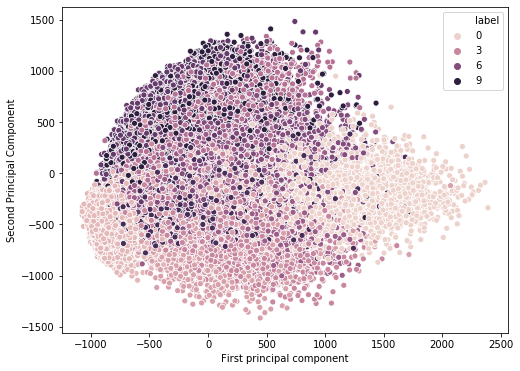

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Pca1[:,0],y=Pca1[:,1],hue=df['label'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Logistics Regression after PCA

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
x_pca=Pca1

In [73]:
x_pca.shape

(42000, 5)

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29400, 5), (12600, 5), (29400,), (12600,))

In [75]:
model_lr=LogisticRegression()

In [76]:
%%timeit
model_lr.fit(x_train,y_train)

5.23 s ± 283 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [86]:
y_train_pred=model_lr.predict(x_train)

In [94]:
print(cross_val_score(model_lr,x_pca,y,cv=7,scoring='accuracy').mean())

0.6711904761904762


In [88]:
y_test_pred=model_lr.predict(x_test)

In [89]:
testing_score = accuracy_score(y_test,y_test_pred)
print(f'Accuracy for testing : {testing_score}')

Accuracy for testing : 0.666984126984127


In [90]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1249
           1       0.78      0.95      0.85      1440
           2       0.59      0.54      0.56      1218
           3       0.67      0.64      0.65      1357
           4       0.60      0.64      0.62      1242
           5       0.59      0.53      0.56      1140
           6       0.62      0.60      0.61      1215
           7       0.69      0.75      0.72      1285
           8       0.63      0.64      0.63      1190
           9       0.55      0.45      0.49      1264

    accuracy                           0.67     12600
   macro avg       0.66      0.66      0.66     12600
weighted avg       0.66      0.67      0.66     12600



## SVM after PCA 

In [99]:
model_svc1=SVC()

In [100]:
%%timeit
model_svc1.fit(x_train,y_train)

29.7 s ± 5.69 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [102]:
y_test_pred1=model_svc1.predict(x_test)

In [103]:
testing_score = accuracy_score(y_test,y_test_pred1)
print(f'Actesting : {testing_score}')

Actesting : 0.756984126984127


In [104]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1249
           1       0.92      0.95      0.94      1440
           2       0.76      0.66      0.70      1218
           3       0.80      0.69      0.74      1357
           4       0.63      0.69      0.66      1242
           5       0.71      0.75      0.73      1140
           6       0.70      0.77      0.74      1215
           7       0.83      0.73      0.78      1285
           8       0.67      0.80      0.73      1190
           9       0.63      0.60      0.61      1264

    accuracy                           0.76     12600
   macro avg       0.76      0.75      0.75     12600
weighted avg       0.76      0.76      0.76     12600

